## Logistic Regression

### The Linear regression model is used when a given target attribute is quantitative or continuous in nature. 

### However, to predict a categorical target attribute, we often rely upon the logistic regression which gives us a bounded probability within the range of [0,1].

### To study the logistic regression, we take Iris dataset and determines the decision boundary using sepal width and length. 

### To initiate, we load features into variable X and target species into variable Y.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [25]:
iris = datasets.load_iris()

In [26]:
X = iris.data[:, :2]  # Sepal Width and Sepal Length
Y = iris.target       # Species -> Setosa, Versicolor, Virginica

In [27]:
lm = linear_model.LogisticRegression(C = 1.0)
lm.fit(X, Y)

LogisticRegression()

### The parameter 'C' is the *inverse* of regularization strength (C = 1/λ).

### - A *large* C (like 1e5) means *weak* regularization, which *increases* the risk of overfitting by fitting the training data too closely.
### - A *small* C (like 1.0 or 0.1) means *strong* regularization, which helps *prevent* overfitting, especially with smaller datasets.

### We will use a standard value of C=1.0.

### Once the model is fit, we're set to define the decision boundary for each species based on selected features. 

### To do so, we create a mesh grid whose X and Y-axis range is equal to the minimum and maximum range of Sepal Length and Sepal Width.

In [28]:
# Range of X and Y axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [29]:
# Step size in the mesh
h = .02 

In [30]:
# Creating Mesh Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

### Next, we predict the decision boundary with the given data and visualize it using colored mesh as shown.

In [31]:
Z = lm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

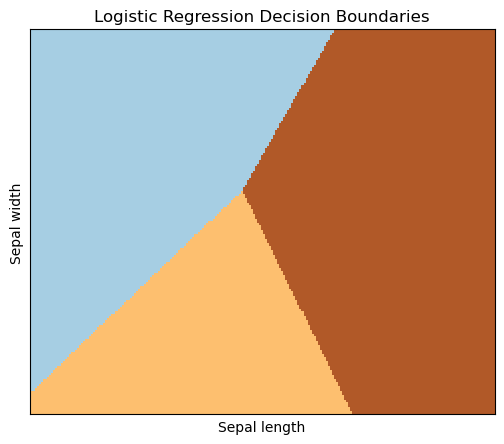

In [32]:
plt.figure(1, figsize=(6, 5)) # You can adjust figsize
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Labeling
plt.title('Logistic Regression Decision Boundaries')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

### The colored boundaries classify the species (in order: Blue: Setosa, Orange: Versicolor, and Green: Virginica). 

### For clarification, we integrate the actual data points onto the plot.

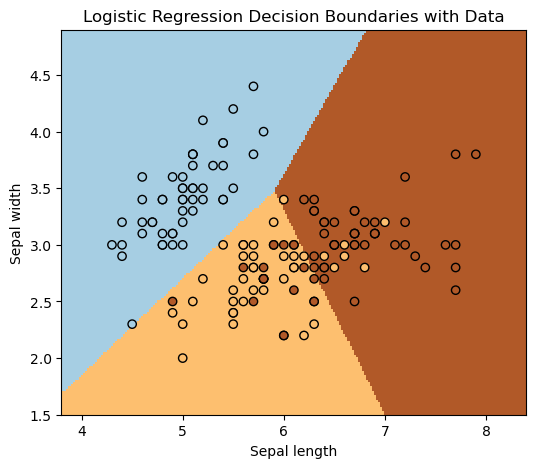

In [33]:
plt.figure(2, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

# Add labels and title
plt.title('Logistic Regression Decision Boundaries with Data')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()